#Preparação das bibliotecas e carga dos dados

In [1]:
import pandas as pd
dados_url="/content/A114710189_28_143_208.csv"
dados=pd.read_csv(dados_url, encoding= "ISO-8859-1", skiprows= 3, sep=";", skipfooter= 12, thousands=".", decimal=",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


#Preparação e Manipulação dos dados

In [2]:
#ajustando formatação de valor decimal para visualizar melhor
pd.options.display.float_format = '{:.2f}'.format

#filtrando apenas a colunas que possuem dados (retirando colunas com observacoes nulas)
colunas_usaveis=dados.mean().index.tolist()

#inserindo a coluna Unidade da Federação para filtro na lista
colunas_usaveis.insert(0, "Unidade da Federação")

#montando um novo dataframe para usar a Unidade da Federação como index
usaveis = dados[colunas_usaveis]

#alterando o index para utilizar a coluna Unidade da Federação
usaveis = usaveis.set_index("Unidade da Federação")

#testando o comando slice com essa nova base
usaveis[["2021/Jan" , "2021/Fev" , "2021/Mar"]]


,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,
11 Rondônia,8414690.60,6039419.59,4732441.04
12 Acre,3005561.16,2272733.90,1137341.65
13 Amazonas,24439059.57,13679358.06,6799060.80
14 Roraima,3209323.68,3044798.77,2381844.31
15 Pará,33887773.65,23343222.94,13069564.31
16 Amapá,2513766.36,1534733.18,989155.40
17 Tocantins,347626.85,416534.32,928756.84
21 Maranhão,26797697.76,23260245.95,17294509.11
22 Piauí,18437275.64,13636005.36,9542151.53


In [18]:
#obtendo o mesmo resultado, de formas diferentes

#filtrando colunas do dataframe
usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [19]:
#filtrando as mesmas informações usando o index (não pode transpor o dataframe)
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [27]:
#reduzindo o número de observações, é possível estudar e entender melhor a visuação de um gráfico

#pegando 5 primeiras linhas
usaveis_sem_total[:5]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2688315.70,2740952.07,247

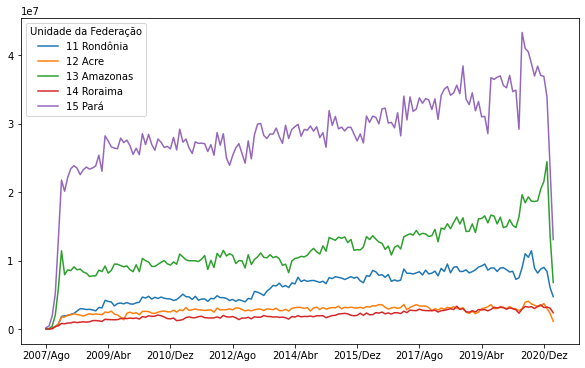

In [28]:
#olhando gráfico de linhas apenas com esta amostra
usaveis_sem_total[:5].T.plot(figsize=(10,6))

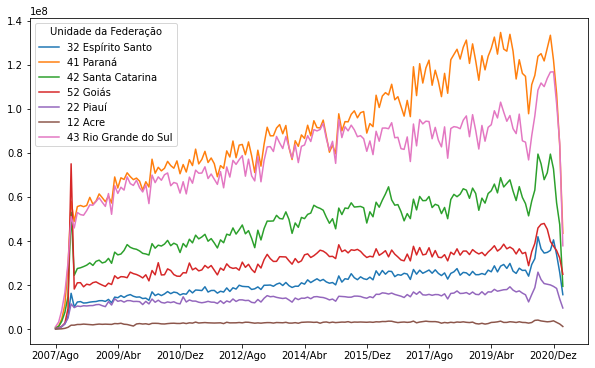

In [47]:
#filtrando o dataframe usando aleatoriedade
#a cada execução o filtro puxará 7 registros diferentes
usaveis_sem_total.sample(n=7).T.plot(figsize=(10,6))

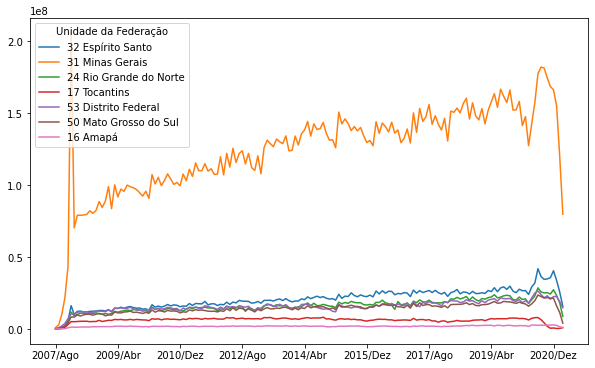

In [48]:
#utilizando numpy, vamos usar aleatoriedade com a mesma semente
import numpy as np

np.random.seed(687942)

#a partir de agora a aleatoriedade permanecerá a mesma
usaveis_sem_total.sample(n=7).T.plot(figsize=(10,6))

#a semente funciona apenas para esta celula

#Desafio #01: Trocar pallete de cores do gráfico gerado

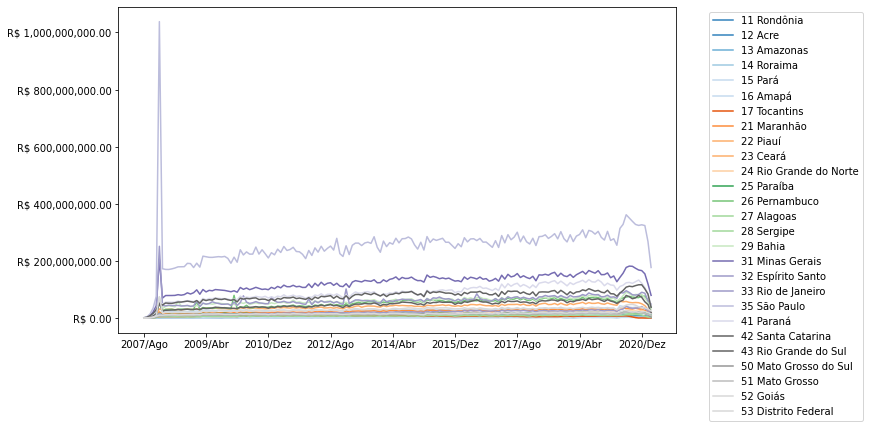

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#retirando a informação "Total" para evitar atrapalhar a visualização
usaveis_sem_total=usaveis.drop(labels="Total", axis=1)

#montando plot, verticalizando o dataframe, substituindo paleta de cores com get_cmap
ax = usaveis_sem_total.T.plot(figsize=(10,6), cmap=plt.get_cmap('tab20c'))

#ajustando visualização da informação do eixo y de valores em Reais
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

#ajustando caixa de legenda para fora do gráfico
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

#Desafio #02: Adicionar uma coluna a cada linha para marcar a região de cada Estado

In [104]:
#filtrando apenas a colunas que possuem dados (retirando colunas com observacoes nulas)
colunas_usaveis=dados.mean().index.tolist()

#inserindo a coluna Unidade da Federação para filtro na lista
colunas_usaveis.insert(0, "Unidade da Federação")

#montando um novo dataframe para montarmos a coluna regiao
df_com_regiao = dados[colunas_usaveis]

#avaliando a coluna "Unidade da Federação" percebemos um padrão no nome dos Estados
#o primeiro caracter nos ajuda a definir a região
#usamos função "str.slice(stop=1)" para poder ficar apenas com o primeiro caracter
#usamos função lambda para poder incluir a lógica para montar o valor da coluna "regiao"
df_com_regiao["regiao"] = dados["Unidade da Federação"].str.slice(stop=1).apply(
    lambda x: 'Norte'    if x == '1' else 
              'Nordeste' if x == '2' else
              'Sudeste'  if x == '3' else
              'Sul'      if x == '4' else 'Centro-Oeste')

#alterando o index para utilizar a coluna Unidade da Federação
df_com_regiao = df_com_regiao.set_index("Unidade da Federação")

#testando o comando slice com essa nova base
df_com_regiao[["regiao" , "2021/Jan" , "2021/Fev" , "2021/Mar"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,regiao,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,
11 Rondônia,Norte,8414690.60,6039419.59,4732441.04
12 Acre,Norte,3005561.16,2272733.90,1137341.65
13 Amazonas,Norte,24439059.57,13679358.06,6799060.80
14 Roraima,Norte,3209323.68,3044798.77,2381844.31
15 Pará,Norte,33887773.65,23343222.94,13069564.31
16 Amapá,Norte,2513766.36,1534733.18,989155.40
17 Tocantins,Norte,347626.85,416534.32,928756.84
21 Maranhão,Nordeste,26797697.76,23260245.95,17294509.11
22 Piauí,Nordeste,18437275.64,13636005.36,9542151.53


#Desafio #03: Montar um gráfico com apenas os 5 estados com maior gastos, ordenador de forma decrescente, e com boa formatação, boa descrição

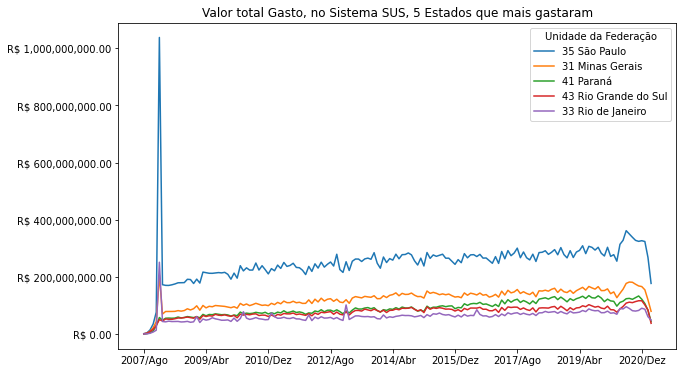

In [120]:
#gerando dataframe ordenado
ordenado_por_total = df_com_regiao.sort_values("Total" , ascending=False)
ordenado_por_total = ordenado_por_total.drop(["Total" , "regiao"] , axis=1)
ax_ordenado = ordenado_por_total.head(5).T.plot(figsize=(10,6))

#ajustando visualização da informação do eixo y de valores em Reais
ax_ordenado.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

#ajustando o título do gráfico
plt.title("Valor total Gasto, no Sistema SUS, 5 Estados que mais gastaram")
plt.show()

#Desafio #04: Montar outro gráfico agora adicionando outro Estado, de preferência fora da ordenação, para exercitar montar o sub-conjunto, e também retire o período outlier que prejudica visualizar o resultado do gráfico

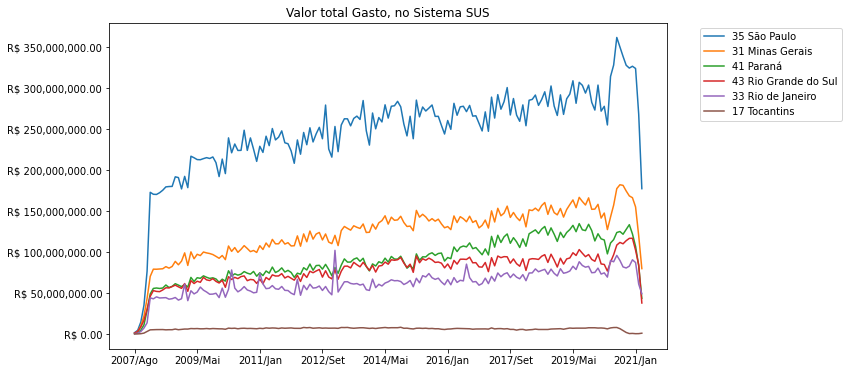

In [152]:
#montando subconjunto de dados com os 5 primeiros estados com maiores gastos
#retirei a variável "2008/Jan" pois já havia observado que essa era a referência
#que houve o outlier, que atrapalhava a visualização
df_compare_maiores_gastos = ordenado_por_total.head().drop("2008/Jan", axis=1)

#adicionando +1 Estado, de forma aleatória a cada execução
#para compará-lo com os 5 maiores gastos
#utilizei o comando append() para poder incluir mais uma observação ao conjunto de dados
ax_compare = df_compare_maiores_gastos.append(ordenado_por_total.sample(n=1).drop("2008/Jan", axis=1)).T.plot(figsize=(10,6))

#ajustando visualização da informação do eixo y de valores em Reais
ax_compare.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

#ajustando o título do gráfico
plt.title("Valor total Gasto, no Sistema SUS")

#ajustando a posição da caixa de legenda
plt.legend(bbox_to_anchor=(1.05,1))

plt.show()

#Desafio #05: Pesquisar no Google alguma correlação de crise sanitária que explique os picos mais acentuados

##Em matéria no site Globo, com dados do Ministério da Saúde, houve um aumento de casos de Dengue em todo Brasil no período de 2012/2013

http://g1.globo.com/bemestar/noticia/2013/02/casos-de-dengue-no-pais-aumentam-190-no-comeco-de-2013-diz-governo.html

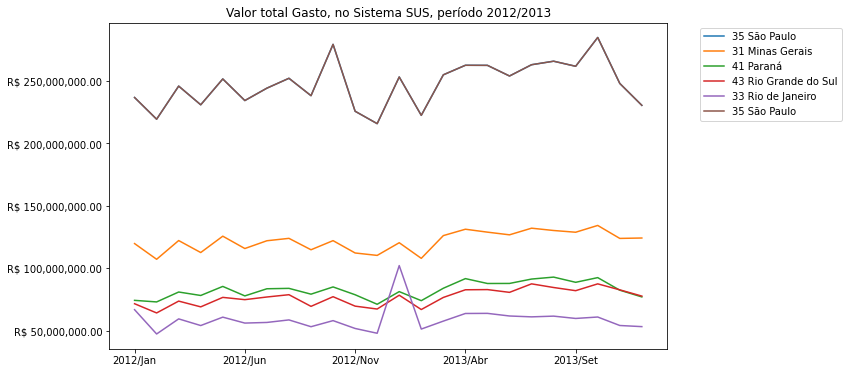

In [159]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

colunas_2012_2013 = ordenado_por_total.columns[53:77]
df_2012_2013_compare = ordenado_por_total.head()[colunas_2012_2013]

#adicionando +1 Estado, de forma aleatória a cada execução
#para compará-lo com os 5 maiores gastos
#utilizei o comando append() para poder incluir mais uma observação ao conjunto de dados
ax_2012_2013_compare = df_2012_2013_compare.append(ordenado_por_total.sample(n=1)[colunas_2012_2013]).T.plot(figsize=(10,6))

#ajustando visualização da informação do eixo y de valores em Reais
ax_2012_2013_compare.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

#ajustando o título do gráfico
plt.title("Valor total Gasto, no Sistema SUS, período 2012/2013")

#ajustando a posição da caixa de legenda
plt.legend(bbox_to_anchor=(1.05,1))

plt.show()

#Desafio #06 e #07: plotar apenas os estados da região Sudeste para tentar visualizar algum padrão de comportamento e tentar correlacionar o pico de 2012/2013 (talvez o clima)

Pelos estudos abaixo, não identificamos uma correlação explícita aos períodos de pico na região Sudeste. Apenas com a visualização gráfica, não consigo afirmar uma correlação forte com o clima.

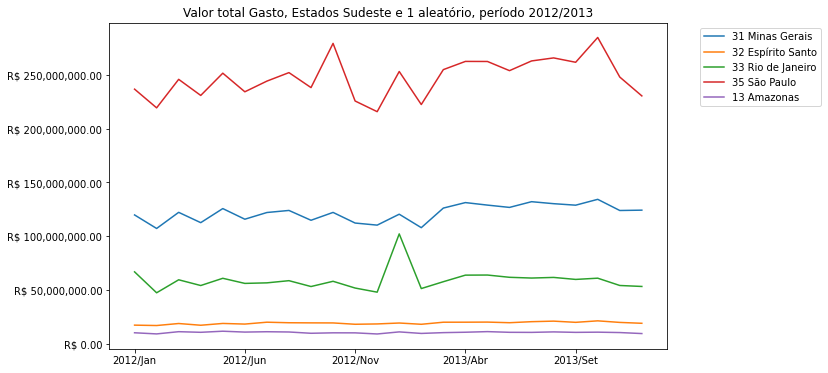

In [167]:
#montei um dataframe apenas com estados da região Sudeste
#já havia montado um dataframe com uma variável tratada, com a marcação de região
#aplicamos filtro pelo método query()
df_sudeste = df_com_regiao.query(expr='regiao=="Sudeste"' , inplace=False)
df_sudeste

#montamos uma variável com as colunas que gostaríamos de dar foco, dos anos de 2012/2013
#período que percebemos um aumento relevante no Brasil dos casos de Dengue
colunas_2012_2013 = ordenado_por_total.columns[53:77]
df_2012_2013_sudeste_compare = df_sudeste[colunas_2012_2013]

#adicionando +1 Estado, de forma aleatória a cada execução
#para compará-lo com os 5 maiores gastos
#utilizei o comando append() para poder incluir mais uma observação ao conjunto de dados
ax_2012_2013_sudeste_compare = df_2012_2013_sudeste_compare.append(df_com_regiao.sample(n=1)[colunas_2012_2013]).T.plot(figsize=(10,6))

#ajustando visualização da informação do eixo y de valores em Reais
ax_2012_2013_sudeste_compare.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

#ajustando o título do gráfico
plt.title("Valor total Gasto, Estados Sudeste e 1 aleatório, período 2012/2013")

#ajustando a posição da caixa de legenda
plt.legend(bbox_to_anchor=(1.05,1))

plt.show()